<a href="https://colab.research.google.com/github/Mark200k/Projecs/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Checking for null values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Checking for data types in each column
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Statistical analysis on data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Checking distribution of male and females
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [ ]:
name = ['female','male']

([<matplotlib.patches.Wedge at 0x7fd515c8ee20>,
 [Text(-0.20611945413751356, 1.080515974257694, 'female'),
  Text(0.20611945413751367, -1.080515974257694, 'male')])

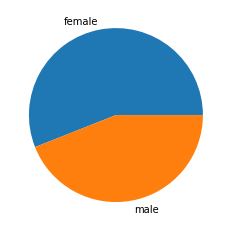

In [ ]:
plt.pie(df.Genre.value_counts(), labels=name)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


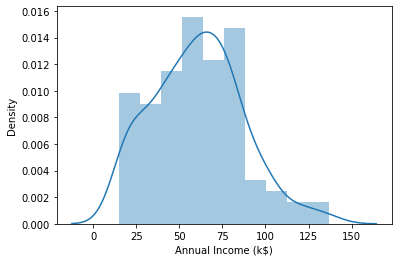

In [ ]:
# Detecting outlier in annual income column
import seaborn as sns
sns.distplot(df['Annual Income (k$)'], kde = True)

In [ ]:
# Removing the outlier
df = df[df['Annual Income (k$)']<125]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


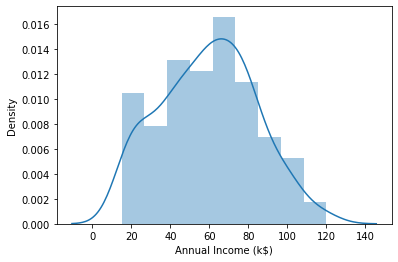

In [ ]:
# Detecting outlier in annual income column
sns.distplot(df['Annual Income (k$)'], kde = True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


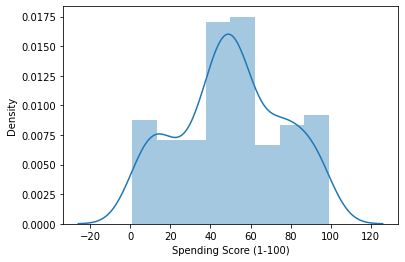

In [ ]:
# Detecting outlier in spending score column
sns.distplot(df['Spending Score (1-100)'], kde = True)

In [ ]:
# Data Scaling
scaler = StandardScaler()
df[['Annual Income (k$)','Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.808460,-0.435233
1,2,Male,21,-1.808460,1.198529
2,3,Female,20,-1.767464,-1.718903
3,4,Female,23,-1.767464,1.042932
4,5,Female,31,-1.726467,-0.396334


In [ ]:
# Elbow curve
distortions = []
inertia = []
mapping1 = {}
mapping2 = {}
K = range(1,15)

# making a seperate array file
array1 = df['Annual Income (k$)'].to_numpy()
array2 = df['Spending Score (1-100)'].to_numpy()
array = np.array(list(zip(array1, array2))).reshape(len(array1),2)

for k in K:
    model = KMeans (n_clusters = k)
    model.fit(array)
    distortions.append(sum(np.min(cdist(array, model.cluster_centers_,
                                        'euclidean'),axis = 1))/array.shape[0])
    inertia.append(model.inertia_)
    mapping1[k] = (sum(np.min(cdist(array, model.cluster_centers_,
                                        'euclidean'),axis = 1))/array.shape[0])
    mapping2[k] = model.inertia_


1:1.2015316793540507
2:1.0328767473225633
3:0.7522947351315306
4:0.6309799253911532
5:0.488821608070224
6:0.4339139474703828
7:0.40411475547718845
8:0.3762687677449956
9:0.35157632408564565
10:0.3342208133887114
11:0.3118033324805029
12:0.29685595118126357
13:0.28019305426733215
14:0.26745573640535614


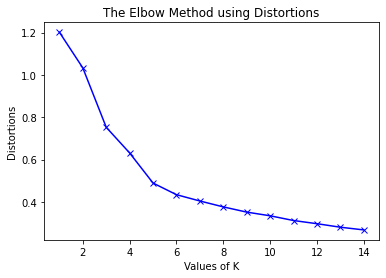

In [ ]:
for key, val in mapping1.items():
    print(str(key) + ':' + str(val))

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortions')
plt.title('The Elbow Method using Distortions')
plt.show()

1:391.9999999999999
2:258.5419516528517
3:154.88331010895362
4:103.94047329878381
5:57.52267788325065
6:48.52384873979912
7:41.38771423778523
8:34.92842345670729
9:30.144635880273697
10:26.878098533794784
11:23.919772247768904
12:21.574561762465066
13:19.44501441010519
14:18.03036433115119


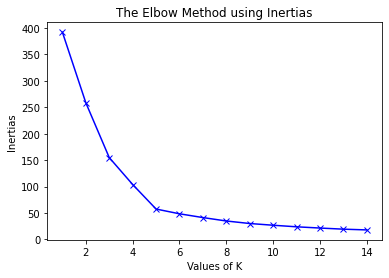

In [ ]:
for key, val in mapping2.items():
    print(str(key) + ':' + str(val))

plt.plot(K, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title('The Elbow Method using Inertias')
plt.show()

In [ ]:
#
data = pd.DataFrame(array, columns = ('Annual Income (k$)','Spending Score (1-100)'))

kmeans = KMeans(n_clusters = 5).fit(data)
centroids = kmeans.cluster_centers_
print('centroids\n:',centroids)

centroids
: [[ 1.04195523 -1.23698675]
 [-1.34501842 -1.13879942]
 [-1.36867665  1.13487562]
 [ 1.02475012  1.2500437 ]
 [-0.18435683 -0.00634578]]


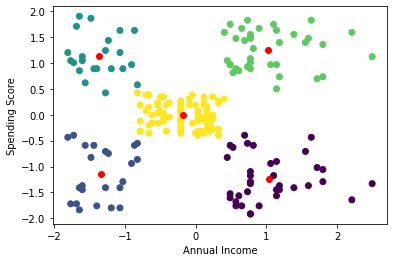

In [ ]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],
            c = kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
# Assignment Question -
# Create seperate clusters for Male and Female members and give some business insights.

In [ ]:
df.head(1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.80846,-0.435233


In [ ]:
# seperating male and female data from population data
x = df[df['Genre'] == 'Male']
y = df[df['Genre'] == 'Female']

In [ ]:
# splitting data as male and female
x1 = x.iloc[:, [3,4]]
y1 = y.iloc[:, [3,4]]

In [ ]:
# fitting clusters on male data
cluster = range(2,15)
inertia = []
for i in cluster:
  model = KMeans(i, n_init = 5, init = 'k-means++', max_iter = 100, random_state = 0)
  model.fit(x1)
  inertia.append(model.inertia_)

In [ ]:
out = pd.DataFrame({"cluster":cluster, "error":inertia})
out

,cluster,error
0,2,104.973198
1,3,61.863858
2,4,39.616362
3,5,21.762007
4,6,18.423424
5,7,15.707979
6,8,13.444204
7,9,11.336932
8,10,10.500816
9,11,9.211474


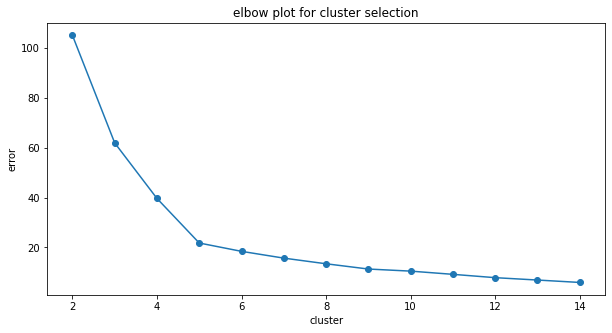

In [ ]:
# plot for elbow method
plt.figure(figsize = (10,5))
plt.plot(out['cluster'], out['error'], marker = 'o')
plt.xlabel("cluster")
plt.ylabel("error")
plt.title("elbow plot for cluster selection")
plt.show()

In [ ]:
# from elbow method we can assign 5 clusters for male data
male_cl = KMeans(n_clusters = 5, init = 'k-means++', random_state = 2)
male_cl.fit(x1)

KMeans(n_clusters=5, random_state=2)

In [ ]:
pred = male_cl.predict(x1)

In [ ]:
len(pred)

85

In [ ]:
clu= pd.DataFrame(pred, columns=["cluster"])

In [ ]:
final = pd.concat([df,clu], axis=1)
final

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,-1.808460,-0.435233,0.0
1,2,Male,21,-1.808460,1.198529,3.0
2,3,Female,20,-1.767464,-1.718903,0.0
3,4,Female,23,-1.767464,1.042932,0.0
4,5,Female,31,-1.726467,-0.396334,0.0
...,...,...,...,...,...,...
191,192,Female,32,1.799257,0.731740,NaN
192,193,Male,33,2.209225,-1.641105,NaN
193,194,Female,38,2.209225,1.587520,NaN
194,195,Female,47,2.496202,-1.329912,NaN
